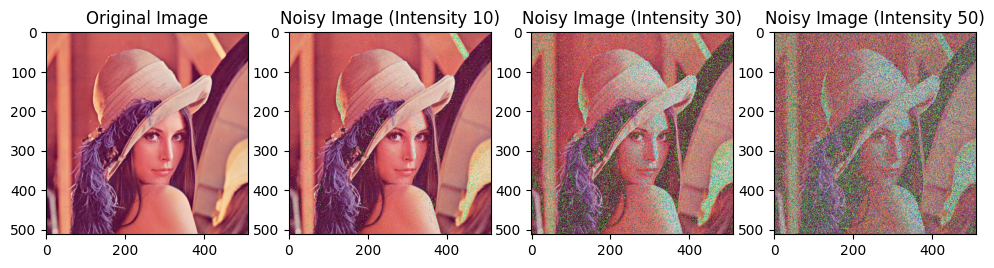

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_path = r"D:\Lenna_(test_image).png"
original_image = Image.open(image_path)

original_array = np.array(original_image)

def add_gaussian_noise(image, intensity):
    row, col, _ = image.shape
    mean = 0
    sigma = intensity
    gauss = np.random.normal(mean, sigma, (row, col, 3))
    noisy = image + gauss.astype(np.uint8)
    return noisy

# Add Gaussian noise for three different intensities
intensity_levels = [10, 30, 50]

noisy_images = [add_gaussian_noise(original_array, intensity) for intensity in intensity_levels]


plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_array)
plt.title('Original Image')

for i, intensity in enumerate(intensity_levels):
    plt.subplot(1, 4, i + 2)
    plt.imshow(noisy_images[i])
    plt.title(f'Noisy Image (Intensity {intensity})')

plt.show()



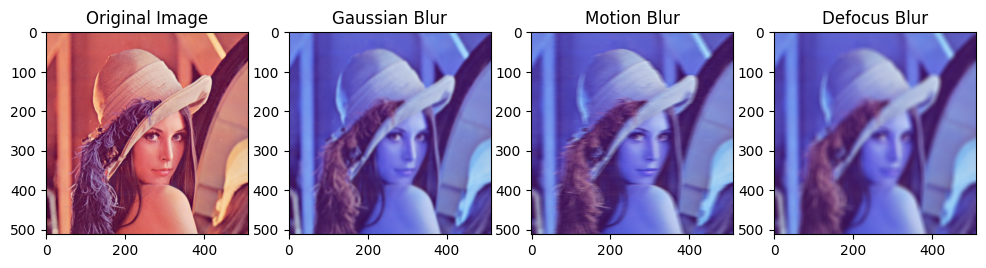

In [14]:


gaussian_blur = cv2.GaussianBlur(original_image, (15, 15), 0)


kernel_size = 15
kernel_motion_blur = np.zeros((kernel_size, kernel_size))
kernel_motion_blur[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_motion_blur = kernel_motion_blur / kernel_size
motion_blur = cv2.filter2D(original_image, -1, kernel_motion_blur)

defocus_blur = cv2.GaussianBlur(original_image, (15, 15), 10)

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blur')

plt.subplot(1, 4, 3)
plt.imshow(motion_blur)
plt.title('Motion Blur')

plt.subplot(1, 4, 4)
plt.imshow(defocus_blur)
plt.title('Defocus Blur')

plt.show()


In [26]:
from skimage import io, metrics
psnr1 = metrics.peak_signal_noise_ratio(original_image,gaussian_blur)
psnr2 = metrics.peak_signal_noise_ratio(original_image, motion_blur)
psnr3 = metrics.peak_signal_noise_ratio(original_image, defocus_blur)

print("PSNR for Gaussian Blur:",psnr1)
print("PSNR for Motion Blur:",psnr2)
print("PSNR for Defocus Blur:",psnr3)

PSNR for Gaussian Blur: 26.949167798202737
PSNR for Motion Blur: 24.663508713681427
PSNR for Defocus Blur: 24.19366931443959


In [27]:
from skimage.metrics import structural_similarity as ssim
def calculate_ssim(original, noisy):
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    noisy_gray = cv2.cvtColor(noisy, cv2.COLOR_BGR2GRAY)
    ssim_value, _ = ssim(original_gray, noisy_gray, full=True)
    return ssim_value


ssim_value1 = calculate_ssim(original_image,gaussian_blur)
print(f"SSIM for Gaussian Blur: {ssim_value1}\n")

ssim_value2 = calculate_ssim(original_image, motion_blur)
print(f"SSIM for Motion Blur: {ssim_value2}\n")


ssim_value3 = calculate_ssim(original_image, defocus_blur)
print(f"SSIM for defocus blur : {ssim_value3}\n")



SSIM for Gaussian Blur: 0.774499636854395

SSIM for Motion Blur: 0.6891789471813994

SSIM for defocus blur : 0.6592073703197086



In [29]:
import lpips
from PIL import Image
import torch
from torchvision import transforms


transform = transforms.ToTensor()
image1_tensor = transform(original_image).unsqueeze(0)
image2_tensor = transform(gaussian_blur).unsqueeze(0)

lpips_model = lpips.LPIPS(net='vgg')

perceptual_similarity = lpips_model(image1_tensor, image2_tensor)

print(f"LPIPS Similarity: {perceptual_similarity.item()}")

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


c:\Users\LEN\miniconda3\envs\py37\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\LEN\miniconda3\envs\py37\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\LEN/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [01:26<00:00, 6.40MB/s] 


Loading model from: c:\Users\LEN\miniconda3\envs\py37\lib\site-packages\lpips\weights\v0.1\vgg.pth
LPIPS Similarity: 0.3748122453689575
